#Ejercicios de regresión logística

##Paso 0: Importar librerias

In [1]:
import numpy as np #trabajar vectores
import pandas as pd #ciencia de datos
import matplotlib.pyplot as plt #graficas sencillas
import seaborn as sns #graficas estadisticas

#Importamos las librerias para una regresion logistica
from sklearn.linear_model import LogisticRegression

###Paso 0.1: Cargar el dataset desde repositorio GITHUB

In [4]:
df = pd.DataFrame() #Creamos la instancia del PD
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/horas_estudio_vs_aprobacion.csv")
df.head()


,horas,aprueba
0,0.50,1
1,2.00,0
2,0.75,0
3,2.75,1
4,2.75,1


##Paso 1:Conociendo los datos

###P1.1 Informacion de la data

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   horas    2000 non-null   float64
 1   aprueba  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,horas,aprueba
count,2000.000000,2000.000000
mean,2.647625,0.496000
std,1.415867,0.500109
min,0.250000,0.000000
25%,1.500000,0.000000
50%,2.750000,0.000000
75%,3.750000,1.000000
max,5.000000,1.000000


###P 1.2 Datos nulos

In [6]:
#Existen datos nulos?
df.isnull()
df.isnull().sum()

horas      0
aprueba    0
dtype: int64

###P 1.3 Conociendo las dimensiones

In [7]:
df.shape
#visualizando filas
df.head(10)

,horas,aprueba
0,0.50,1
1,2.00,0
2,0.75,0
3,2.75,1
4,2.75,1
5,1.25,0
6,2.75,1
7,1.50,1
8,1.50,0
9,0.50,0


###P 1.4 Graficando datos para entender

####P 1.4.1 distribucion

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


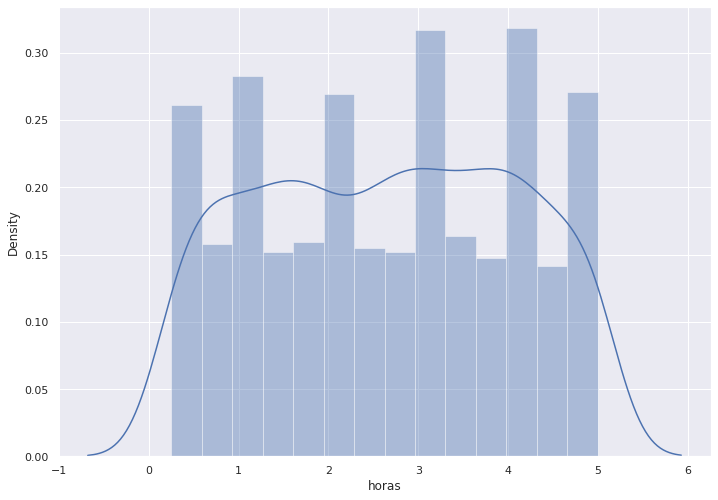

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['horas'])                #agregamos los datos
plt.show()


####P 1.4.2 Graficos en X y Y

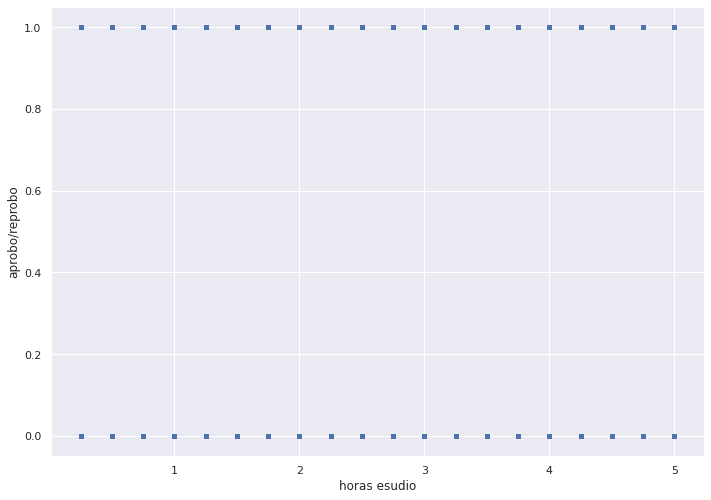

In [13]:
x=df['horas']
y=df['aprueba']
plt.scatter(x,y, s=15, alpha=0.5)
plt.xlabel('horas esudio')
plt.ylabel('aprobo/reprobo')
plt.show()

##Paso 2: Separar datos (train/test)

In [15]:
#Obtengo los datos limpios en x, sin enunciados
#reshape= para poner una sola dimension
xtrain=np.array(df['horas']).reshape(-1,1)
#lo mismo para los datos de y
ytrain=np.array(df['aprueba']).reshape(-1,1)
print(ytrain)

[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


##Paso 3: Crear instancia del modelo y entrenar la regresión logistica

In [16]:
Reg_logistica=LogisticRegression()
Reg_logistica.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Paso 4: Haciendo predicciones

In [17]:
x_horas_estudio=np.array([1,2,4,10,25,30]).reshape(-1,1)
#hacemos la predicccion
prediccion_ap=Reg_logistica.predict(x_horas_estudio)
print(prediccion_ap)

[0 0 1 1 1 1]


##Paso 5: Cuales son las probabilidades(inferencias) 

In [18]:
proba_prediccion=Reg_logistica.predict_proba(x_horas_estudio)
print (proba_prediccion[:,1])

[0.4887889  0.49316478 0.50191901 0.52815322 0.59275646 0.6137064 ]
